## 1. Data wrangling

This notebook contains the steps 3-4 to prepare the dataset for the modelling process:
1. Data collection 
2. Analysis and profiling
3. Quality check assesment
4. Data cleaning

Fistly, I will import the necessary packages

In [1]:
# Import the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.style.use('seaborn') # Set visual style for plots

%matplotlib inline

---
### 1.3. Quality check assesment

This step involves checking for missing or inconsistent values within the variables. A visual inspection is used in the cell below to check for links  

In [2]:
# Import pre-processed dataset and load it into a dataframe

# Create path variable
file = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/pre-selected.csv'

# Create dictionary with categorial variables to specify when loading csv in dataframe
cat_dict = {'COOL_TYPE':'category',
            'EQUIP_AGE':'category',
            'HEAT_TYPE':'category',
            'CLIMATE_REGION':'category',
            
            'HIGH_CEIL':'category',
            'ATTIC':'category',
            'BASEMENT':'category',
            'BEDROOMS':'category',
            'BATHROOMS':'category',
            'THERMOSTAT':'category',
            'SIZEOFGARAGE':'category',
            'STORIES':'category',
            'OWNERSHIP':'category',
            
            'OWNERSHIP':'category',
            'UNIT_TYPE':'category',
            'STORIES':'category',
            'DECADE_BUILT':'category'
              }

# Load csv in dataframe
df = pd.read_csv(file, index_col=0, dtype=cat_dict)

In [3]:
# Inspect number of observations and variables

df.shape

(5666, 22)

In [4]:
# Print sample

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5666 entries, 0 to 5685
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   UNIT_TYPE       5666 non-null   category
 1   CLIMATE_REGION  5666 non-null   category
 2   DECADE_BUILT    5666 non-null   category
 3   HDD65           5666 non-null   float64 
 4   CDD65           5666 non-null   float64 
 5   FLOOR_AREA      5666 non-null   float64 
 6   COOL_TYPE       5666 non-null   category
 7   EQUIP_AGE       5666 non-null   category
 8   HEAT_TYPE       5666 non-null   category
 9   HIGH_CEIL       5380 non-null   category
 10  ATTIC           4216 non-null   category
 11  BASEMENT        4216 non-null   category
 12  BEDROOMS        5666 non-null   category
 13  THERMOSTAT      4886 non-null   category
 14  SIZEOFGARAGE    2562 non-null   category
 15  STORIES         4216 non-null   category
 16  OWNERSHIP       5666 non-null   category
 17  COOL_COST     

In the next cell, it can be seen the density and distribution of missing values (NaN) thoughout the full dataset. 

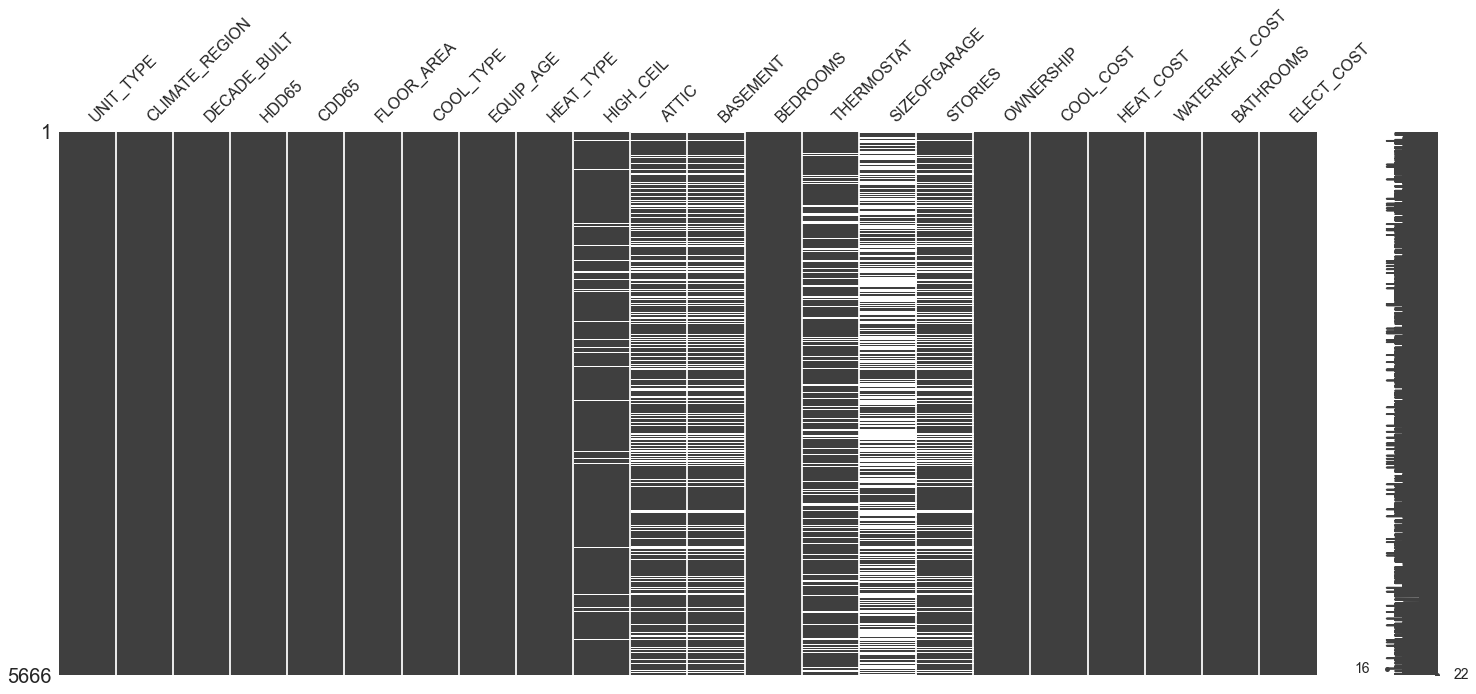

In [5]:
# Visualize missigness density and distribution

m = msno.matrix(df)
plt.show()

As expected, some variables present scattered missing values, since "-2" (Non-applicable) values were substituted by NaN values in previous steps.

The next two cells present same graph but sorted by unit type and climate respectively. The goal is to find out if these missing values are distributed random-wise or are consistent with other classification: 

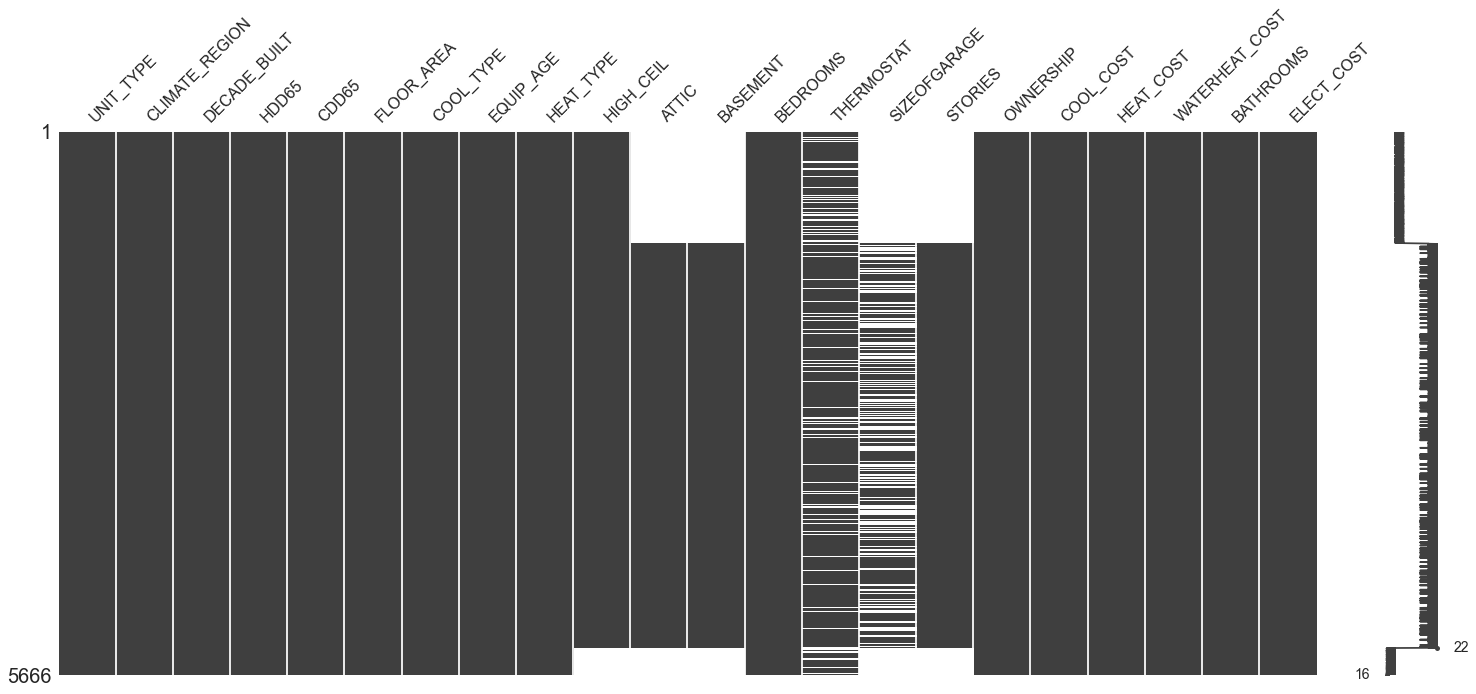

In [6]:
# Visualize missigness density and distribution by unit type

df_byTYPEHUQ = df.sort_values(by='UNIT_TYPE')

m = msno.matrix(df_byTYPEHUQ)
plt.show()

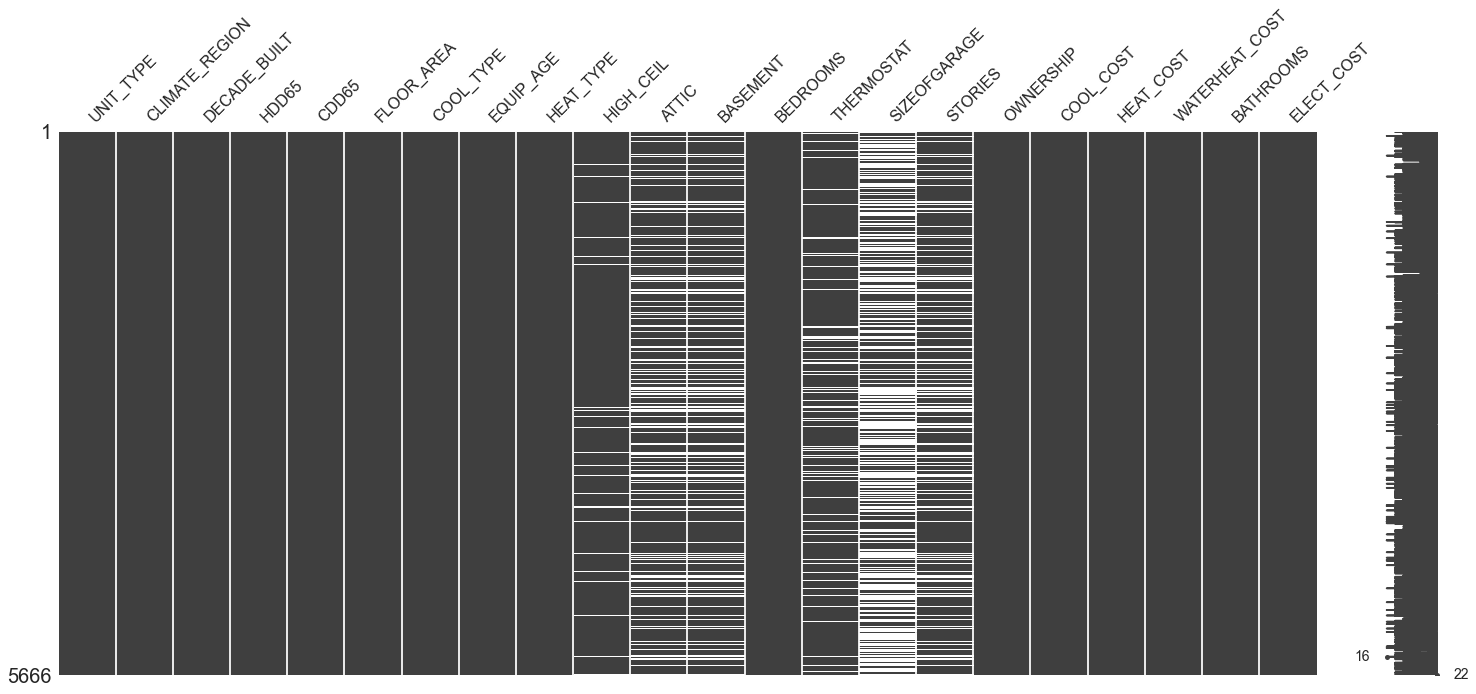

In [7]:
# Visualize missigness density and distribution by unit type

df_byCLIMATE = df.sort_values(by='CLIMATE_REGION')

m = msno.matrix(df_byCLIMATE)
plt.show()

It seems that most of these NaN values correspond to construction features that make sense only in certain types of units, i.e. Condo units cannot have basement or attic. 

Final data inspection:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5666 entries, 0 to 5685
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   UNIT_TYPE       5666 non-null   category
 1   CLIMATE_REGION  5666 non-null   category
 2   DECADE_BUILT    5666 non-null   category
 3   HDD65           5666 non-null   float64 
 4   CDD65           5666 non-null   float64 
 5   FLOOR_AREA      5666 non-null   float64 
 6   COOL_TYPE       5666 non-null   category
 7   EQUIP_AGE       5666 non-null   category
 8   HEAT_TYPE       5666 non-null   category
 9   HIGH_CEIL       5380 non-null   category
 10  ATTIC           4216 non-null   category
 11  BASEMENT        4216 non-null   category
 12  BEDROOMS        5666 non-null   category
 13  THERMOSTAT      4886 non-null   category
 14  SIZEOFGARAGE    2562 non-null   category
 15  STORIES         4216 non-null   category
 16  OWNERSHIP       5666 non-null   category
 17  COOL_COST     

---

### 1.4. Data cleaning

In this section NaN values will be replaced or removed according to its meaning and nature. For our dataset, the best option to deal with missing entries is to replace them with "0" value, representing the standard benchmark for the attributes in most cases. 

In [9]:
# Replace NaN values by 0 in selected variables

df.ATTIC.fillna('0.0', inplace=True)
df.BASEMENT.fillna('0.0', inplace=True)

df.SIZEOFGARAGE.cat.add_categories('0.0', inplace=True)
df.SIZEOFGARAGE.fillna('0.0', inplace=True)

df.THERMOSTAT.fillna('0.0', inplace=True)
df.HIGH_CEIL.fillna('0.0', inplace=True)

# In the case of STORIES variable (categorical) NaN values are replaced by 1, assuming a baseline of 1.

df.STORIES.fillna('1', inplace=True) 

A simple boxplot is used to find values out of the interquartile range (outliers):

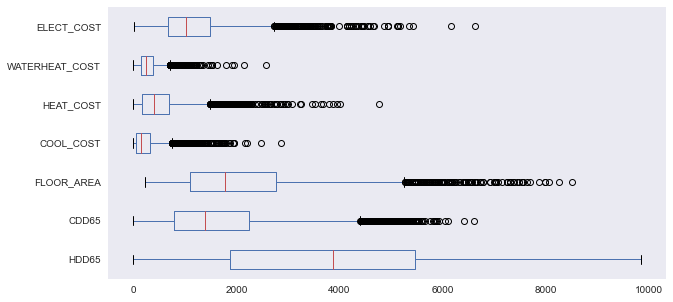

In [10]:
# Select non-categorical variables
df_numeric = df.loc[:, df.dtypes != 'category']

# Plot boxplot for all selected variables
df_numeric.boxplot(grid=False, vert=False, fontsize=10, figsize=(10,5))
plt.show()

It can be observed a number of outliers in most of the continuous variables which have right long tailed distribution as shown in the previous notebook. 

Instead of removing these extremes data points, a better approach is to apply logarithmic data transformation to de-emphasizes outliers and obtain a potential bell-shaped distribution by restoring the symmetry.

In [11]:
# Import necessary package
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransformer
log = PowerTransformer()

# Transform numeric variables

df['WATERHEAT_COST_log'] = log.fit_transform(df[['WATERHEAT_COST']])

df['FLOOR_AREA_log'] = log.fit_transform(df[['FLOOR_AREA']])

df['HEAT_COST_log'] = log.fit_transform(df[['HEAT_COST']])

df['ELECT_COST_log'] = log.fit_transform(df[['ELECT_COST']])

df['COOL_COST_log'] = log.fit_transform(df[['COOL_COST']])

df['CDD65_log'] = log.fit_transform(df[['CDD65']])

df['HDD65_log'] = log.fit_transform(df[['HDD65']])

In [12]:
# Drop original columns

df.drop(columns=['WATERHEAT_COST', 'FLOOR_AREA', 'HEAT_COST', 'ELECT_COST', 'COOL_COST', 'CDD65', 'HDD65'], inplace=True)

In [13]:
# Check values in a random newly created variable from log transformation

df['ELECT_COST_log'].value_counts()

 0.010633    3
-0.822567    3
-0.440312    3
 1.054386    2
-0.580468    2
            ..
 0.362094    1
-0.172782    1
 1.198723    1
-1.008411    1
 0.065564    1
Name: ELECT_COST_log, Length: 5584, dtype: int64

Histograms of the newly created variables are presented below: 

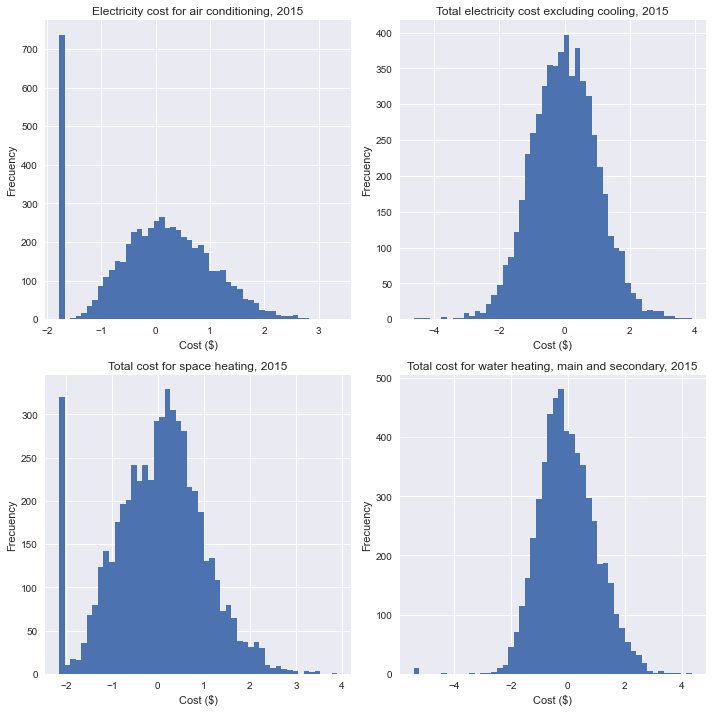

In [14]:
# Plot histograms of log transformed utility spending variables

fig = plt.figure(figsize=(10,10), dpi=72) # Create figure

plt.subplot(2,2,1)
plt.hist(df['COOL_COST_log'], bins=50)
plt.title('Electricity cost for air conditioning, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(2,2,2)
plt.hist(df['ELECT_COST_log'], bins=50)
plt.title('Total electricity cost excluding cooling, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(2,2,3)
plt.hist(df['HEAT_COST_log'], bins=50)
plt.title('Total cost for space heating, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.subplot(2,2,4)
plt.hist(df['WATERHEAT_COST_log'], bins=50)
plt.title('Total cost for water heating, main and secondary, 2015')
plt.xlabel('Cost ($)')
plt.ylabel('Frecuency')

plt.tight_layout()
plt.show()

A new boxplot is created to assess the presence of outliers after the log transformation:

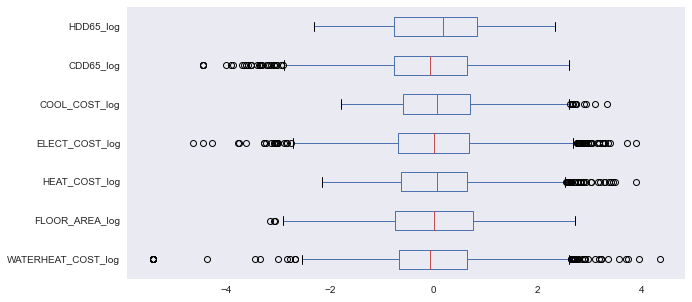

In [15]:
# Select non-categorical variables
df_numeric = df.loc[:, df.dtypes != 'category']

# Plot boxplot for all selected variables
df_numeric.boxplot(grid=False, vert=False, fontsize=10, figsize=(10,5))
plt.show()

Finally, columns are rearranged and the dataset is stored as a csv file

In [16]:
# Rearrange columns for better organization

column_list = ['UNIT_TYPE', 'CLIMATE_REGION', 'DECADE_BUILT', 'HDD65_log', 'CDD65_log',
       'FLOOR_AREA_log', 'COOL_TYPE', 'EQUIP_AGE', 'HEAT_TYPE', 'THERMOSTAT',
       'HIGH_CEIL', 'ATTIC', 'BASEMENT', 'BEDROOMS', 'BATHROOMS',
       'SIZEOFGARAGE', 'STORIES', 'OWNERSHIP', 'COOL_COST_log', 'HEAT_COST_log',
       'WATERHEAT_COST_log', 'ELECT_COST_log']

df = df[column_list]

In [17]:
# Write df dataframe to csv

path = 'C:/Users/javie/OneDrive/Documents/springboard_projects/Capstone-2/data/interim/clean.csv'

df.to_csv(path)